In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

# Create a 'data' directory
os.makedirs('data', exist_ok=True)

# -- Scrape // Services ---
services_url = 'https://www.capsitech.com/services/'
services_response = requests.get(services_url)
services_soup = BeautifulSoup(services_response.text, 'html.parser')

#learning HTML structure after refering the Services page
service_headers = services_soup.find_all('h1')  #  services in h1 tags
services = [h1.get_text(strip=True) for h1 in service_headers if h1.get_text(strip=True)]

# Save  services as  CSV file
if services:
    services_df = pd.DataFrame(services, columns=["SERVICES :"])
    services_df.to_csv('data/services.csv', index=False)
    print("[✔] Services saved to data/services.csv")
else:
    print("[!] No services found.")

# --- Scrape Team Members ---
about_url = 'https://www.capsitech.com/about/'
about_response = requests.get(about_url)
about_soup = BeautifulSoup(about_response.text, 'html.parser')

# Team members
team_names = about_soup.find_all('h6')  # Team member names in h6
team_members = [h6.get_text(strip=True) for h6 in team_names if h6.get_text(strip=True)]

# Save team members as CSV file
if team_members:
    team_df = pd.DataFrame(team_members, columns=["TEAM MEMBERS :"])
    team_df.to_csv('data/team.csv', index=False)
    print("[✔] Team members saved to data/team.csv")
else:
    print("[!] No team members found.")

# --- Scrape Contact Info ---
contact_url = 'https://www.capsitech.com/contact/'
contact_response = requests.get(contact_url)
contact_soup = BeautifulSoup(contact_response.text, 'html.parser')

# Extract contact details
address = contact_soup.find('p').get_text(strip=True) if contact_soup.find('p') else 'Not Found'
email_tag = contact_soup.find('a', href=lambda h: h and 'mailto:' in h)
phone_tag = contact_soup.find('a', href=lambda h: h and 'tel:' in h)

contact_data = {
    "ADDRESS :": [address],
    "EMAIL :": [email_tag.get_text(strip=True) if email_tag else 'Not Found'],
    "PHONE :": [phone_tag.get_text(strip=True) if phone_tag else 'Not Found']
}

# Save the contact info as CSV file
contact_df = pd.DataFrame(contact_data)
contact_df.to_csv('data/contact.csv', index=False)
print("[✔] Contact info saved to data/contact.csv")

print("\n Web scraping completed successfully.")


[✔] Services saved to data/services.csv
[✔] Team members saved to data/team.csv
[✔] Contact info saved to data/contact.csv

 Web scraping completed successfully.


[✔] Services data loaded successfully.
               SERVICES :
0  Comprehensive Services
1       ProductManagement
2      Project Management
3    Accounting Solutions
4             IT Training
[✔] Team members data loaded successfully.
         TEAM MEMBERS :
0           Dave Jangid
1          Mohit Baheti
2  Satya Narayan Jangid
3         Mukesh Jangid
4    Anand Vardhan Soni
[✔] Contact info data loaded successfully.
                                           ADDRESS :           EMAIL :  \
0  H-299, 3rd Phase,RIICO Industrial Area,Boranad...  hr@capsitech.com   

           PHONE :  
0  +91 79769 15860  

--- Services Analysis ---
Total number of services: 7
Services:                                SERVICES :
0                  Comprehensive Services
1                       ProductManagement
2                      Project Management
3                    Accounting Solutions
4                             IT Training
5               HumanResource Outsourcing
6  Let's build somethinga

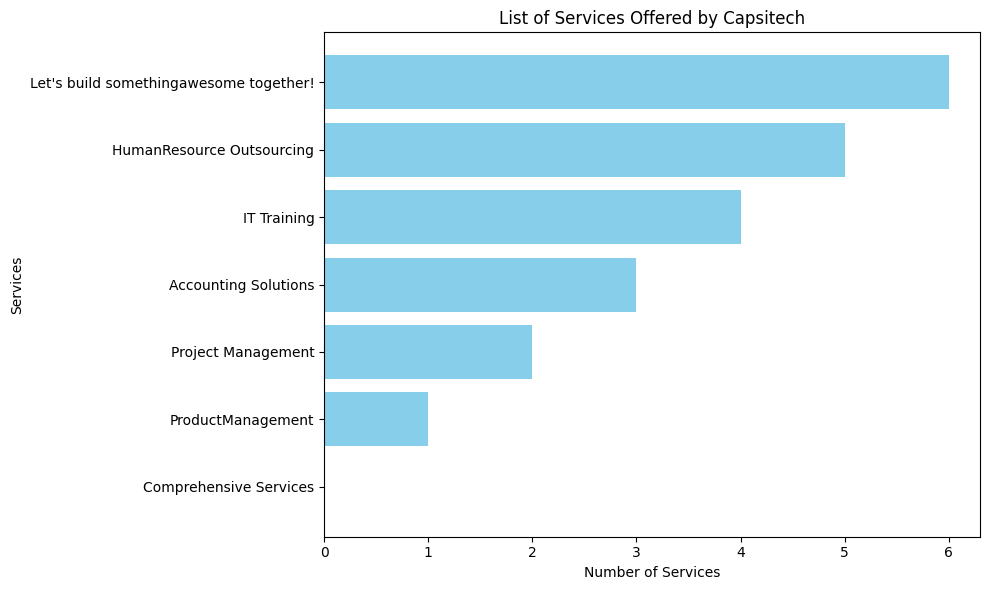


--- Team Members Analysis ---
Total number of team members: 5
Team Members:          TEAM MEMBERS :
0           Dave Jangid
1          Mohit Baheti
2  Satya Narayan Jangid
3         Mukesh Jangid
4    Anand Vardhan Soni


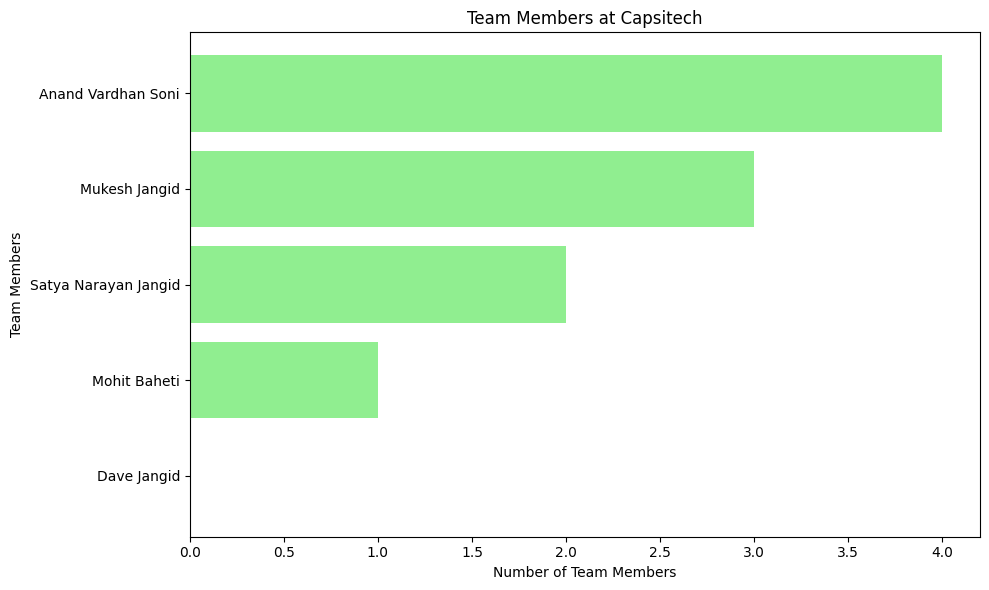


--- Contact Info ---
Address: H-299, 3rd Phase,RIICO Industrial Area,Boranada, Jodhpur - 342012(Raj) INDIA
Email: hr@capsitech.com
Phone: +91 79769 15860

--- Analysis Of  Scraping Completed ---


In [2]:
#Analysis of scraped data

import pandas as pd
import matplotlib.pyplot as plt

# --- Load Data ---
# Load services data
try:
    services_df = pd.read_csv('data/services.csv')
    print("[✔] Services data loaded successfully.")
    print(services_df.head())  # Print few rows for debug
except FileNotFoundError:
    print("[!] Services data not found. Please run the scraper first.")
    services_df = pd.DataFrame()

# Load team members data
try:
    team_df = pd.read_csv('data/team.csv')
    print("[✔] Team members data loaded successfully.")
    print(team_df.head())  # Print  few rows for debug
except FileNotFoundError:
    print("[!] Team members data not found. Please run the scraper first.")
    team_df = pd.DataFrame()

# Load contact info data
try:
    contact_df = pd.read_csv('data/contact.csv')
    print("[✔] Contact info data loaded successfully.")
    print(contact_df.head())  # Print  few rows for debug
except FileNotFoundError:
    print("[!] Contact info data not found. Please run the scraper first.")
    contact_df = pd.DataFrame()

# --- Analyze Services ---
if not services_df.empty:
    print("\n--- Services Analysis ---")
    print(f"Total number of services: {len(services_df)}")
    print(f"Services: {services_df}")  # Print full data for debug

    # Plotting services count
    plt.figure(figsize=(10, 6))
    plt.barh(services_df.iloc[:, 0], range(len(services_df)), color='skyblue')
    plt.xlabel('Number of Services')
    plt.ylabel('Services')
    plt.title('List of Services Offered by Capsitech')
    plt.tight_layout()
    plt.savefig('services_analysis.png')  # for Saving the plot as a PNG image
    plt.show()
else:
    print("[!] No services data to analyze.")

# --- Analyze Team Members ----
if not team_df.empty:
    print("\n--- Team Members Analysis ---")
    print(f"Total number of team members: {len(team_df)}")
    print(f"Team Members: {team_df}")  # Print full data for debug


    # Plot team members count
    plt.figure(figsize=(10, 6))
    plt.barh(team_df.iloc[:, 0], range(len(team_df)), color='lightgreen')
    plt.xlabel('Number of Team Members')
    plt.ylabel('Team Members')
    plt.title('Team Members at Capsitech')
    plt.tight_layout()
    plt.savefig('team_analysis.png')  #  for Saving the plot as a PNG image
    plt.show()
else:
    print("[!] No team members data to analyze.")

# ----. Analyze Contact Info ----
if not contact_df.empty:
    print("\n--- Contact Info ---")

    # Displaying contact details
    print(f"Address: {contact_df['ADDRESS :'][0]}")
    print(f"Email: {contact_df['EMAIL :'][0]}")
    print(f"Phone: {contact_df['PHONE :'][0]}")
else:
    print("[!] No contact data to analyze.")

print("\n--- Analysis Of  Scraping Completed ---")
